In [2]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.charts import Histogram
import random


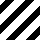
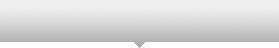
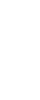
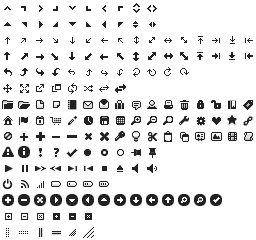
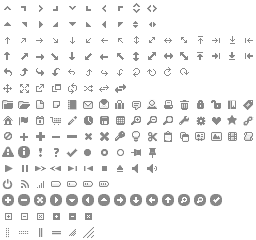
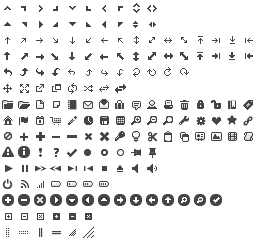
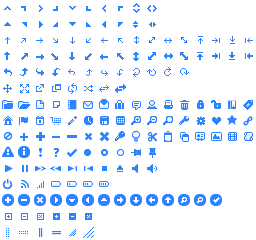
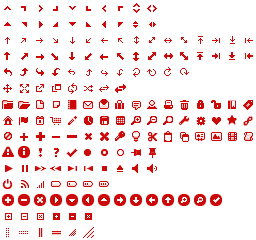
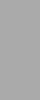
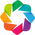
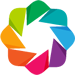
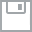
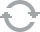
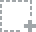
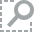
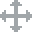
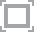
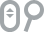

In [3]:
output_notebook()

The `random` module gives us lots of ways to get and use random numbers. Actually, it uses psuedo-random numbers. Without an external source of randomness, a computer cannot generate real random numbers.

Let's create our own random number generator.

In [4]:
def rng(seed=1):
    """This is a very simple psuedo-random number generator."""
    def rand():
        nonlocal seed
        seed = (7 * seed) % 101
        return (seed - 1) % 10 + 1

    return rand

In [5]:
rand = rng(892)

In [13]:
print(rand())
print(rand())
print(rand())

1
6
9


That seemed to work. What happens if we run it 100 times?

In [14]:
nums = [rand() for _ in range(100)]

In [15]:
hist = Histogram(nums, bins=10, notebook=True, tools=False, 
                 title="My RNG", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

We got each number the same amount of times, which isn't very random. We'd expect that they'd be close, but not all the same.

Let's look at a random number generator implementation from BSD Unix. This is not a very good RNG -- it's too predictable -- but better than ours.

In [16]:
def bsd_rand(seed):
   def rand():
      nonlocal seed
      seed = (1103515245*seed + 12345) & 0x7fffffff
      return seed / 2147483647
   return rand

In [17]:
rand = bsd_rand(1)
nums = [rand() for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, title="bsd_rand", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

# The random module

Everything in the `random` module is built off of `random.random`. This is psuedo-random, as you can see here.

In [18]:
random.seed(1)
[random.random() for _ in range(5)]

[0.13436424411240122,
 0.8474337369372327,
 0.763774618976614,
 0.2550690257394217,
 0.49543508709194095]

In [19]:
random.seed(1)
[random.random() for _ in range(5)]

[0.13436424411240122,
 0.8474337369372327,
 0.763774618976614,
 0.2550690257394217,
 0.49543508709194095]

This is a better random number generator than ours, of course, so the numbers generated will not be 100% evenly distributed.

In [21]:
nums = [random.random() for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, 
                 title="random.random", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

## Other distributions

In [22]:
nums = [random.triangular(0, 1) for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, 
                 title="random.triangular", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

In [23]:
nums = [random.gauss(0.5, 0.5) for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, 
                 title="random.gauss", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

In [24]:
nums = [random.expovariate(2) for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, 
                 title="random.expovariate", ylabel="frequency", xlabel='distributions')
hist.height(400).show()